# Setup

In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

# For reproducibility,
np.random.seed(99)

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

# Functions

In [2]:
def read(x):
    arr1 = []
    arr2 = []
    for file in os.listdir(x):
        img = cv.imread(x+'/'+file)
        if img is not None:
            arr1.append(img) #add image to array
            arr2.append(file) #add filename to array
    arr1 = np.array(arr1, "object")
    arr2 = np.array(arr2, "object")
    
    return arr1, arr2

In [3]:
def display(arr):
    
    n = len(arr)
    cols = 5
    rows = (n+4)//5
    
    # To convert the images to RGB images
    img = [cv.cvtColor(sign, cv.COLOR_BGR2RGB) for sign in arr]
    
    # Resize all the images
    fig = plt.figure(figsize = (100//cols,100))
    
    #display all images
    for i in range(n):
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(img[i]), plt.axis('off')
    plt.show()

In [4]:
def display20(arr):
    
    n = 20
    cols = 5
    rows = 4
    
    # To convert the images to RGB images
    img = [cv.cvtColor(sign, cv.COLOR_BGR2RGB) for sign in arr]
    
    # Resize all the images
    fig = plt.figure(figsize = (10,10))
    
    #display all images
    for i in range(n):
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(img[i]), plt.axis('off')
    plt.show()

In [5]:
#BGR image
def color_segment(img):
    
    #Apply median blur
    blur = cv.medianBlur(img, 5)
    
    #HSV
    hsv = cv.cvtColor(blur, cv.COLOR_BGR2HSV)

    #mask
    mask_blue = cv.inRange(hsv, blue_low, blue_high)
    mask_red = cv.inRange(hsv, red_low, red_high)
    mask_red2 = cv.inRange(hsv, red_low2, red_high2)
    mask_yellow = cv.inRange(hsv, yellow_low, yellow_high)
    mask2 = cv.add(mask_blue, mask_yellow)
    mask3 = cv.add(mask_red, mask_red2)
    #final mask
    final_mask = cv.add(mask2, mask3)
    #segment using color mask
    res = cv.bitwise_and(img, img, mask = final_mask)
    
    #find edges and contour to draw bounding box
    res_blur = cv.GaussianBlur(res, (5, 5), 0)
    
    canny = cv.Canny(res_blur, 50, 250, apertureSize = 3)
    
    contours, hierarchy = cv.findContours(canny, cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
    
    length = []
    if len(contours) > 0:
        for i in contours:
            length.append(len(i))

        Idx_max = np.argmax(length)
        cnt = contours[Idx_max]

        x, y, w, h = cv.boundingRect(cnt)
    else: #no contours
        x=0
        y=0
        w=0
        h=0
    #draw bounding box    
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1, cv.LINE_AA)
    #save bounding box information for performance measure
    colour_results.append([x, y, x+w, y+h])
    return img


# Read

In [6]:
# Load traffic sign images from folder
path = 'C:/Users/Simon Loh/Documents/GitHub/Traffic-Sign-Segmentation/test/'
#images store images, labels store filenames
images, labels = read(path)

# Display

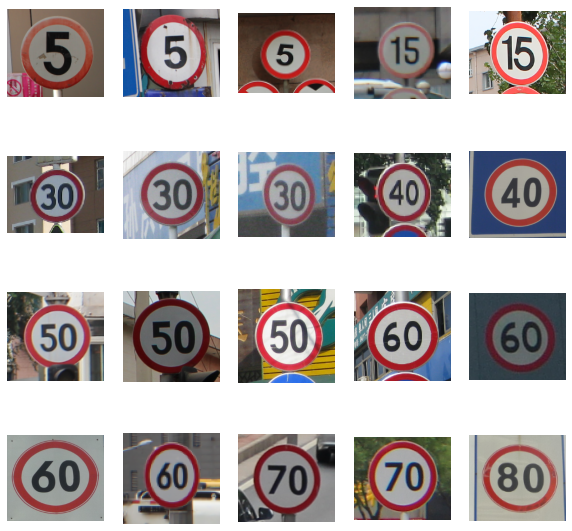

In [7]:
display20(images)

In [8]:
labels

array(['000_0002.png', '000_0018.png', '000_0031.png', '001_0002.png',
       '001_0011.png', '002_0010.png', '002_0025.png', '002_1_0015.png',
       '003_0014.png', '003_0101.png', '004_0005.png', '004_0016.png',
       '004_1_0030.png', '005_0026.png', '005_0051.png', '005_0058.png',
       '005_1_0014.png', '006_0006.png', '006_1_0035.png', '007_0027.png',
       '008_0001.png', '008_0005_j.png', '010_0034.png', '011_0006.png',
       '011_0027.png', '011_0047.png', '011_0048.png', '011_1_0046.png',
       '012_0044.png', '013_0001.png', '014_0009.png', '014_1_0010.png',
       '015_1_0001.png', '015_1_0002.png', '016_0005.png', '016_0035.png',
       '017_0010.png', '017_0050.png', '017_1_0016.png', '017_1_0028.png',
       '021_0002.png', '021_0004.png', '021_1_0001.png',
       '022_1_0007_1_j.png', '024_0002.png', '024_0042.png',
       '024_1_0003.png', '026_0004.png', '026_0006.png', '026_0032.png',
       '027_0012.png', '027_0013.png', '028_0044.png', '028_0105.png',
      

# Load answers (annotations)

In [9]:
ans = {}
#category
with open("TsignRecgTrain4170Annotation.txt", mode='r') as filestream:
    for line in filestream:
        cur = line.split(";")
        key = cur[0]
        for i in range(1,8):
            cur[i] = int(cur[i])
        ans[key] = cur[1:8]

In [10]:
ans

{'000_0001.png': [134, 128, 19, 7, 120, 117, 0],
 '000_0002.png': [165, 151, 23, 12, 149, 138, 0],
 '000_0003.png': [128, 122, 22, 14, 116, 105, 0],
 '000_0010.png': [80, 73, 14, 8, 67, 63, 0],
 '000_0011.png': [186, 174, 36, 15, 155, 157, 0],
 '000_0012.png': [186, 164, 22, 15, 162, 150, 0],
 '000_0013.png': [158, 127, 31, 15, 134, 113, 0],
 '000_0014.png': [155, 125, 27, 13, 132, 111, 0],
 '000_0015.png': [156, 137, 33, 15, 136, 117, 0],
 '000_0016.png': [94, 87, 17, 11, 83, 75, 0],
 '000_0017.png': [322, 302, 50, 24, 281, 286, 0],
 '000_0018.png': [212, 194, 39, 14, 184, 180, 0],
 '000_0019.png': [315, 281, 51, 23, 275, 257, 0],
 '000_0020.png': [104, 90, 19, 14, 85, 79, 0],
 '000_0021.png': [108, 94, 21, 13, 90, 80, 0],
 '000_0022.png': [103, 90, 19, 12, 88, 78, 0],
 '000_0023.png': [103, 92, 19, 13, 87, 78, 0],
 '000_0024.png': [96, 92, 17, 14, 81, 80, 0],
 '000_0025.png': [86, 87, 13, 13, 79, 76, 0],
 '000_0026.png': [105, 99, 17, 7, 92, 87, 0],
 '000_0027.png': [84, 68, 21, 13, 

# Copy

In [11]:
train = images.copy()

In [12]:
train.shape

(100,)

# Segment

In [13]:
blue_low = (80, 150, 60)
blue_high = (140, 255, 255)

red_low = (0, 70, 50)
red_high = (10, 255, 255)

red_low2 = (170, 70, 50)
red_high2 = (179, 255, 255)

yellow_low = (5, 105,65)
yellow_high = (40, 255, 255)

kernel = np.ones((5,5), np.uint8)
colour_results = []
index=0
color_segmented = [color_segment(img) for img in train]

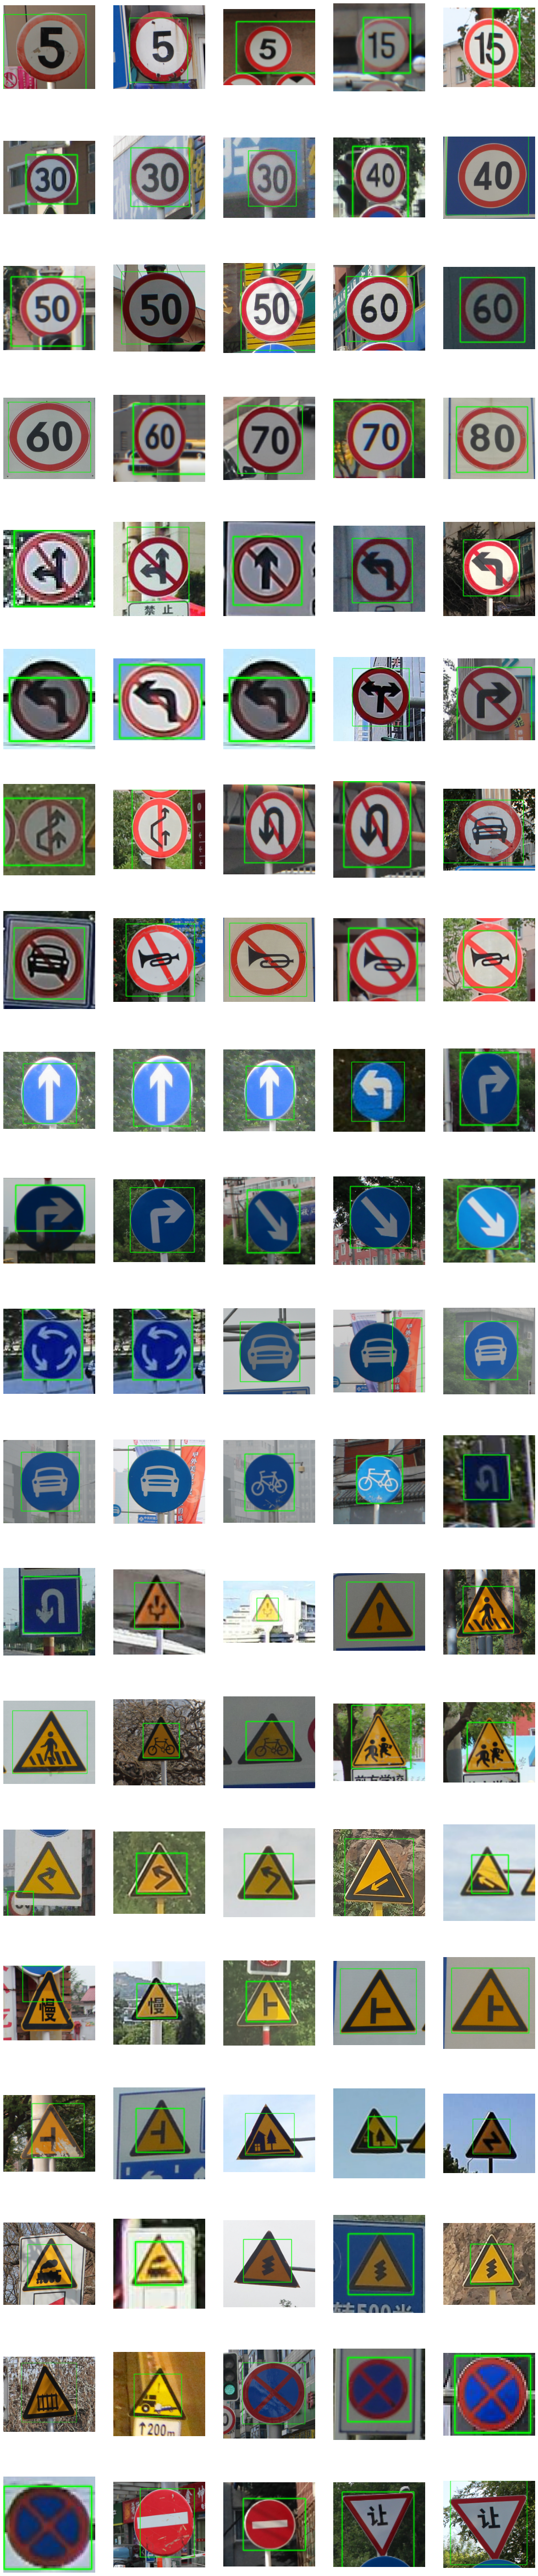

In [14]:
display(color_segmented)

# Performance measure

In [15]:
def area(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
    area = cv.countNonZero(thresh)
    return area

In [16]:
def perf(results):
    perfs=[]
    nice_images = []
    index=0
    for result in results:
        #get result bounding box dimensions
        x1,y1,x2,y2=result
        
        #get truth bounding box dimensions
        truth = ans[labels[index]]
        width, height, x1t, y1t, x2t, y2t = truth[:6]
        
        #create screen, simulate bounding box
        result_mask = np.zeros((height,width,3), "uint8")
        cv.rectangle(result_mask, (x1,y1), (x2, y2), (255, 255, 255), -1)  
        truth_mask = np.zeros((height,width,3), "uint8")
        cv.rectangle(truth_mask, (x1t,y1t), (x2t, y2t), (255, 255, 255), -1)
        TP_mask = cv.bitwise_and(result_mask, truth_mask)
        FP_mask = cv.bitwise_and(result_mask, cv.bitwise_not(truth_mask))
        FN_mask = cv.bitwise_and(truth_mask, cv.bitwise_not(result_mask))
        TN_mask = cv.bitwise_not(TP_mask)
        
        #find areas
        TP = area(TP_mask)
        FP = area(FP_mask)
        FN = area(FN_mask)
        TN = area(TN_mask)

        #calculate based on overlapping of both masks
        accuracy = (TP+TN)/(TP+TN+FP+FN)
        precision = TP/(TP+FP)
        recall = TP/(TP+FN)
        if precision ==0 and recall ==0: #if precision and recall = 0
            f1=0
        else:
            f1 = (2*precision*recall)/(precision+recall)
        perfs.append([index, accuracy,precision,recall,f1])
        
       
        nice_images.append([labels[index], accuracy])
        
        index+=1
        
    #convert to dataFrame    
    df = pd.DataFrame(perfs)
    
    #print each perf measure
    print("Average accuracy",df[1].mean())
    print("Average precision",df[2].mean())
    print("Average recall",df[3].mean())
    print("Average f1 score",df[4].mean())
    
    return nice_images

In [17]:
array_img = perf(colour_results)

Average accuracy 0.9067742212809953
Average precision 0.9115838408194757
Average recall 0.861133074028595
Average f1 score 0.8691077692613999


# Convert to dataframe and export to csv

In [18]:
len(array_img)

100

In [20]:
df = pd.DataFrame(array_img)

In [21]:
df.columns=['filename','accuracy']

In [22]:
df.to_csv('accuracy.csv')

In [23]:
df

filename  accuracy
0     000_0002.png  0.823201
1     000_0018.png  0.894262
2     000_0031.png  0.813109
3     001_0002.png  0.933461
4     001_0011.png  0.741671
..             ...       ...
95  054_1_0098.png  0.932187
96    055_0005.png  0.936712
97  055_1_0060.png  0.918817
98    056_0054.png  0.891932
99  056_1_0012.png  0.828664

[100 rows x 2 columns]